In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import itertools

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train, X_test = X_train/255, X_test/255 

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax')
])

In [7]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [8]:
r = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2927 - accuracy: 0.9143 - val_loss: 0.1345 - val_accuracy: 0.9604
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1407 - accuracy: 0.9591 - val_loss: 0.0974 - val_accuracy: 0.9701
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1078 - accuracy: 0.9672 - val_loss: 0.0819 - val_accuracy: 0.9735
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0792 - val_accuracy: 0.9776
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0741 - accuracy: 0.9768 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0645 - accuracy: 0.9793 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 0.0745 - val_accuracy:

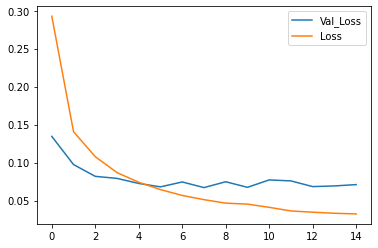

In [9]:
plt.plot(r.history['val_loss'],label = 'Val_Loss')
plt.plot(r.history['loss'],label = 'Loss')
plt.legend()

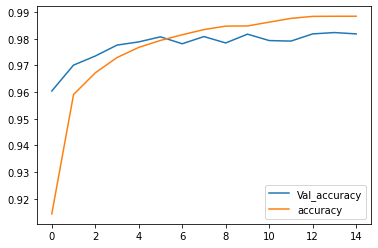

In [10]:
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.legend()

In [11]:
def plot_confusion_matrix(cm,
                          classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalise:
    cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
    print('normalised confusion matrix')
  else:
    print('non-normalised confusion matrix')

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalise else 'd'
  thresh = cm.max()/2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.show()



In [12]:
predictions = model.predict(X_test).argmax(axis=1)

In [13]:
cm = confusion_matrix(y_test,predictions)

non-normalised confusion matrix


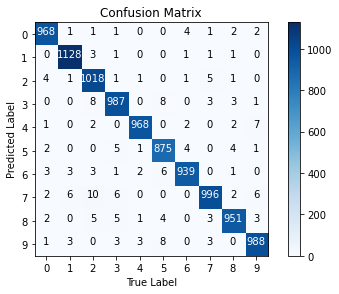

In [14]:
plot_confusion_matrix(cm,list(range(10)))